<img src="spam.jpg" width="700" height="700">

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("spam.csv",encoding = 'ISO-8859-1')

In [3]:
data.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5263,ham,Pls speak with me. I wont ask anything other t...,NaN,NaN,NaN
428,ham,7 at esplanade.. Do Ì_ mind giving me a lift c...,NaN,NaN,NaN
4317,ham,S...i will take mokka players only:),NaN,NaN,NaN
3967,ham,Did u turn on the heater? The heater was on an...,NaN,NaN,NaN
3917,ham,No need to ke qi... ÌÏ too bored izzit y sudde...,NaN,NaN,NaN
3977,ham,Reason is if the team budget is available at l...,NaN,NaN,NaN


# 1.Data cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [5]:
data.loc[data["Unnamed: 3"].notnull(),:]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2170,ham,\CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...,JUST REALLYNEED 2DOCD.PLEASE DONTPLEASE DONTIG...,"U NO THECD ISV.IMPORTANT TOME 4 2MORO\""""",NaN
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3145,ham,\SHIT BABE.. THASA BIT MESSED UP.YEH,SHE SHUDVETOLD U. DID URGRAN KNOW?NEWAY,"ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""""",NaN
3506,ham,Two fundamentals of cool life: \Walk,"like you are the KING\""...! OR \""Walk like yo...","whoever is the KING\""!... Gud nyt""",NaN
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""


In [6]:
#drop last 3 columns
data = data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data = data.rename(columns={"v1":"type", "v2":"msg"})

In [8]:
data.sample(5)

,type,msg
1926,ham,Dont give a monkeys wot they think and i certa...
4853,ham,"Also north carolina and texas atm, you would j..."
1777,spam,Buy Space Invaders 4 a chance 2 win orig Arcad...
3275,ham,Lol your right. What diet? Everyday I cheat an...
325,ham,No calls..messages..missed calls


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["type"] = le.fit_transform(data["type"])

In [10]:
data.head(5)

,type,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Missing values
data.isnull().sum()

type    0
msg     0
dtype: int64

In [12]:
# Duplicate values
data.duplicated().sum()

403

In [13]:
data[data.duplicated()==True].head(5)

,type,msg
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls


In [14]:
data = data.drop_duplicates(keep='first')

In [15]:
data.duplicated().sum()

0

In [16]:
data.shape

(5169, 2)

# 2. EDA

In [17]:
data["type"].value_counts()

0    4516
1     653
Name: type, dtype: int64

In [18]:
import matplotlib.pyplot as plt

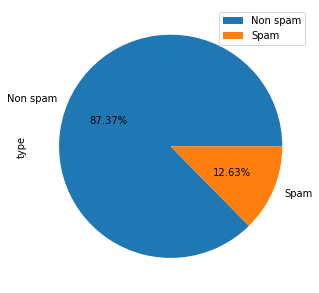

In [19]:
plt.figure(figsize=(5,7))
data["type"].value_counts().plot.pie(labels = ["Non spam", "Spam"], autopct = '%.2f%%')
plt.legend()

In [20]:
import nltk

In [21]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
data["nb_carac"] = data["msg"].apply(len)
data.head()

,type,msg,nb_carac
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
data["nb_word"] = data["msg"].apply(lambda x:len(nltk.tokenize.word_tokenize(x)))
data.head()

,type,msg,nb_carac,nb_word
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
data["nb_sent"] = data["msg"].apply(lambda x:len(nltk.tokenize.sent_tokenize(x)))
data.head()

,type,msg,nb_carac,nb_word,nb_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
data.groupby("type").describe().T

type                      0           1
nb_carac count  4516.000000  653.000000
         mean     70.459256  137.891271
         std      56.358207   30.137753
         min       2.000000   13.000000
         25%      34.000000  132.000000
         50%      52.000000  149.000000
         75%      90.000000  157.000000
         max     910.000000  224.000000
nb_word  count  4516.000000  653.000000
         mean     16.958370   27.474732
         std      13.395014    6.893007
         min       1.000000    2.000000
         25%       8.000000   25.000000
         50%      13.000000   29.000000
         75%      22.000000   32.000000
         max     219.000000   44.000000
nb_sent  count  4516.000000  653.000000
         mean      1.815545    2.969372
         std       1.364098    1.488910
         min       1.000000    1.000000
         25%       1.000000    2.000000
         50%       1.000000    3.000000
         75%       2.000000    4.000000
         max      38.000000    9.000000

In [26]:
import seaborn as sns

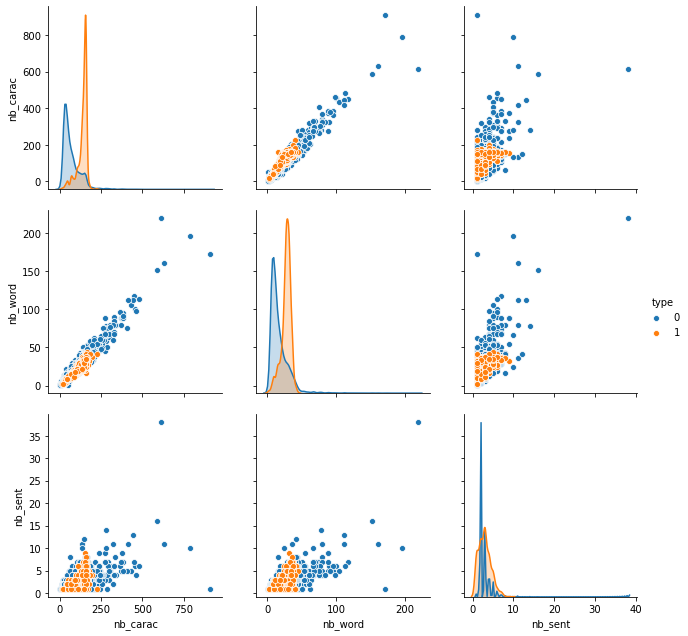

In [27]:
sns.pairplot(data,
             hue="type",
             x_vars=["nb_carac", "nb_word", "nb_sent"],
             y_vars=["nb_carac", "nb_word", "nb_sent"],
             height=3,
             diag_kind='auto'
    )

In [28]:
mat_corr = data.corr()

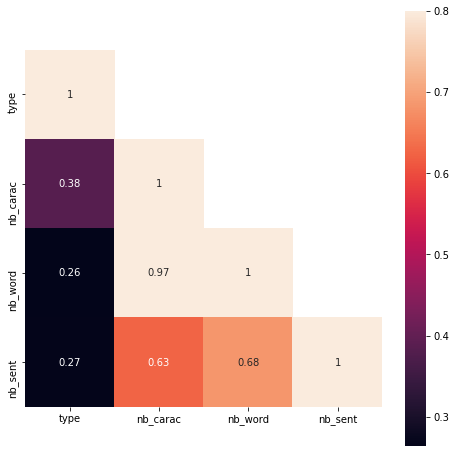

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
mask = np.array(mat_corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(mat_corr, mask=mask, vmax=.8, square=True, annot=True, ax= ax)

# 3. Data preprocessing

In [30]:
import re

In [31]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
stop_words = nltk.corpus.stopwords.words("english")

In [33]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [34]:
def transform_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    l_text = nltk.tokenize.word_tokenize(text)
    l_word = [word for word in l_text if not word in stop_words]
    stemmed_words = [stemmer.stem(word) for word in l_word]
    return " ".join(stemmed_words)

In [35]:
data["transformed_text"] = data["msg"].apply(transform_text)

In [36]:
data.sample(10)

,type,msg,nb_carac,nb_word,nb_sent,transformed_text
5378,1,Free entry to the gr8prizes wkly comp 4 a chan...,160,28,1,free entri gr8prize wkli comp 4 chanc win late...
4436,0,How come u got nothing to do?,29,8,1,come u got noth
1752,0,Give one miss from that number please,37,7,1,give one miss number pleas
4580,0,Not course. Only maths one day one chapter wit...,75,17,2,cours math one day one chapter one month finish
1759,0,Do u ever get a song stuck in your head for no...,107,28,1,u ever get song stuck head reason wont go away...
2945,0,make that 3! 4 fucks sake?! x,29,10,3,make 3 4 fuck sake x
2041,0,ÌÏ dun wan to watch infernal affair?,36,8,1,dun wan watch infern affair
4366,0,I like dis sweater fr mango but no more my siz...,70,15,1,like di sweater fr mango size alreadi irrit
2387,0,Also where's the piece,22,5,1,also where piec
5261,0,I absolutely LOVE South Park! I only recently ...,74,14,2,absolut love south park recent start watch offic


In [37]:
from wordcloud import WordCloud

In [38]:
wc = WordCloud(width=500,
              height=500,
              min_font_size=10,
              background_color='white')

In [39]:
df_spam = data[data["type"]== 1]["transformed_text"].str.cat(sep=" ")
df_ham = data[data["type"]== 0]["transformed_text"].str.cat(sep=" ")

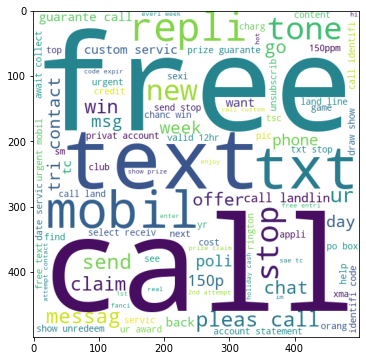

In [40]:
plt.figure(figsize=(12,6))
spam_wc = wc.generate(df_spam)
plt.imshow(spam_wc)

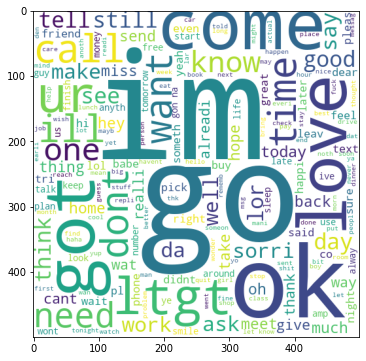

In [41]:
plt.figure(figsize=(12,6))
ham_wc = wc.generate(df_ham)
plt.imshow(ham_wc)

In [42]:
l_spam_words = df_spam.split(' ')
l_ham_words = df_ham.split(' ')

In [43]:
from collections import Counter

In [44]:
Counter(l_spam_words).most_common(30)

[('call', 321),
 ('free', 188),
 ('2', 155),
 ('txt', 137),
 ('u', 123),
 ('text', 122),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 101),
 ('repli', 100),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('tone', 62),
 ('send', 59),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('week', 49),
 ('pleas', 49),
 ('win', 48),
 ('tc', 44),
 ('collect', 44),
 ('min', 44)]

In [45]:
Counter(l_ham_words).most_common(5)

[('u', 876), ('im', 441), ('go', 401), ('get', 350), ('2', 288)]

# 4. Modeling

## 4.1 Naive Bays

### 4.1.1 Using CountVectorizer

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
Vectorizer = CountVectorizer()

In [48]:
X = Vectorizer.fit_transform(data["transformed_text"]).toarray()

In [49]:
X.shape

(5169, 8017)

In [50]:
Y = data["type"]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 2
                                                   )

In [53]:
x_train.shape

(4135, 8017)

In [54]:
x_test.shape

(1034, 8017)

In [55]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

In [56]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score

In [57]:
NB = {}

In [58]:
B_NB = BernoulliNB()
B_NB.fit(x_train,y_train)
pred = B_NB.predict(x_test)
print("Accuracy : {0}\nPrecision : {1}\nConfusion matrix:\n{2}".format(accuracy_score(y_test,pred),
                                                              precision_score(y_test,pred),
                                                             confusion_matrix(y_test,pred)))
NB["Bernoulli"] = [accuracy_score(y_test,pred), precision_score(y_test,pred)]

Accuracy : 0.9709864603481625
Precision : 0.9821428571428571
Confusion matrix:
[[894   2]
 [ 28 110]]


In [59]:
G_NB = GaussianNB()
G_NB.fit(x_train,y_train)
pred = G_NB.predict(x_test)
print("Accuracy : {0}\nPrecision : {1}\nConfusion matrix:\n{2}".format(accuracy_score(y_test,pred),
                                                              precision_score(y_test,pred),
                                                             confusion_matrix(y_test,pred)))
NB["Gaussian"] = [accuracy_score(y_test,pred), precision_score(y_test,pred)]

Accuracy : 0.8810444874274661
Precision : 0.5330396475770925
Confusion matrix:
[[790 106]
 [ 17 121]]


In [60]:
M_NB = MultinomialNB()
M_NB.fit(x_train,y_train)
pred = M_NB.predict(x_test)
print("Accuracy : {0}\nPrecision : {1}\nConfusion matrix:\n{2}".format(accuracy_score(y_test,pred),
                                                              precision_score(y_test,pred),
                                                             confusion_matrix(y_test,pred)))
NB["Multinomial"] = [accuracy_score(y_test,pred), precision_score(y_test,pred)]

Accuracy : 0.965183752417795
Precision : 0.8355263157894737
Confusion matrix:
[[871  25]
 [ 11 127]]


In [61]:
df_cv = pd.DataFrame.from_dict(NB,orient='index', columns=["Accuracy_CV", "Precision_CV"])

### 4.1.2 Using TF-IDF Vectorizer

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
tfV = TfidfVectorizer(use_idf=True)

In [64]:
X = tfV.fit_transform(data["transformed_text"]).toarray()
X.shape

(5169, 8017)

In [65]:
Y = data["type"]

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 2
                                                   )

In [67]:
NB = {}

In [68]:
B_NB = BernoulliNB()
B_NB.fit(x_train,y_train)
pred = B_NB.predict(x_test)
print("Accuracy : {0}\nPrecision : {1}\nConfusion matrix:\n{2}".format(accuracy_score(y_test,pred),
                                                              precision_score(y_test,pred),
                                                             confusion_matrix(y_test,pred)))
NB["Bernoulli"] = [accuracy_score(y_test,pred), precision_score(y_test,pred)]

Accuracy : 0.9709864603481625
Precision : 0.9821428571428571
Confusion matrix:
[[894   2]
 [ 28 110]]


In [69]:
G_NB = GaussianNB()
G_NB.fit(x_train,y_train)
pred = G_NB.predict(x_test)
print("Accuracy : {0}\nPrecision : {1}\nConfusion matrix:\n{2}".format(accuracy_score(y_test,pred),
                                                              precision_score(y_test,pred),
                                                             confusion_matrix(y_test,pred)))
NB["Gaussian"] = [accuracy_score(y_test,pred), precision_score(y_test,pred)]

Accuracy : 0.8762088974854932
Precision : 0.5225225225225225
Confusion matrix:
[[790 106]
 [ 22 116]]


In [70]:
M_NB = MultinomialNB()
M_NB.fit(x_train,y_train)
pred = M_NB.predict(x_test)
print("Accuracy : {0}\nPrecision : {1}\nConfusion matrix:\n{2}".format(accuracy_score(y_test,pred),
                                                              precision_score(y_test,pred),
                                                             confusion_matrix(y_test,pred)))
NB["Multinomial"] = [accuracy_score(y_test,pred), precision_score(y_test,pred)]

Accuracy : 0.9564796905222437
Precision : 1.0
Confusion matrix:
[[896   0]
 [ 45  93]]


In [71]:
df_tfv = pd.DataFrame.from_dict(NB,orient='index', columns=["Accuracy_TFV", "Precision_TFV"])

### 4.1.3 Result

In [72]:
NB_result = pd.concat([df_cv,df_tfv], axis=1)
NB_result

,Accuracy_CV,Precision_CV,Accuracy_TFV,Precision_TFV
Bernoulli,0.970986,0.982143,0.970986,0.982143
Gaussian,0.881044,0.533040,0.876209,0.522523
Multinomial,0.965184,0.835526,0.956480,1.000000


## 4.2 Other models

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [74]:
svm = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()

In [75]:
mdls = {
    'SVM':svm,
    'KNN':knn,
    'DT':dtc,
    'LR':lr,
    'RF':rfc,
    'ET':etc,
    'GB':gbc,
    'NB':mnb
}

In [76]:
def run_model(mdl, X_train, Y_train, X_test, Y_test):
    mdl.fit(X_train, Y_train)
    prediction = mdl.predict(X_test)
    return accuracy_score(Y_test, prediction), precision_score(Y_test, prediction)

In [77]:
reslt = []
for n,mdl in mdls.items():
    acc, prec = run_model(mdl, x_train, y_train, x_test, y_test)
    reslt.append([n, acc, prec])

com_df = pd.DataFrame(reslt, columns=["model", "Accuracy", "precision"])

In [78]:
com_df.sort_values(by="precision", ascending=False)

,model,Accuracy,precision
1,KNN,0.896518,1.000000
4,RF,0.970986,1.000000
7,NB,0.956480,1.000000
0,SVM,0.972921,0.974138
5,ET,0.972921,0.966102
3,LR,0.952611,0.940594
6,GB,0.955513,0.925926
2,DT,0.938104,0.855769


(0.0, 1.0)

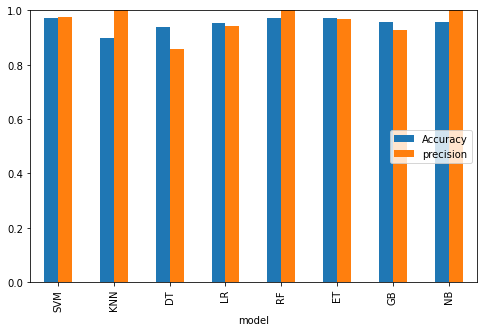

In [79]:
com_df.plot(kind='bar',x="model", figsize=(8,5))
plt.legend(loc='center right')
plt.ylim(0,1)

## 4.3 Model improvement

### 4.3.1 max features

In [80]:
tfV = TfidfVectorizer(use_idf=True, max_features=3000)

In [81]:
X = tfV.fit_transform(data["transformed_text"]).toarray()
X.shape

(5169, 3000)

In [82]:
Y = data["type"]
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 2
                                                   )

In [83]:
reslt = []
for n,mdl in mdls.items():
    acc, prec = run_model(mdl, x_train, y_train, x_test, y_test)
    reslt.append([n, acc, prec])

In [84]:
com_df = pd.merge(com_df, pd.DataFrame(reslt, columns=["model", "Accuracy_3000", "precision_3000"]), on="model")

In [85]:
com_df

,model,Accuracy,precision,Accuracy_3000,precision_3000
0,SVM,0.972921,0.974138,0.975822,0.966942
1,KNN,0.896518,1.000000,0.906190,1.000000
2,DT,0.938104,0.855769,0.940039,0.865385
3,LR,0.952611,0.940594,0.956480,0.951456
4,RF,0.970986,1.000000,0.970986,0.982143
5,ET,0.972921,0.966102,0.977756,0.967480
6,GB,0.955513,0.925926,0.950677,0.939394
7,NB,0.956480,1.000000,0.974855,1.000000


In [86]:
tfV = TfidfVectorizer(use_idf=True, max_features=5000)
X = tfV.fit_transform(data["transformed_text"]).toarray()

In [87]:
Y = data["type"]
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 2
                                                   )

In [88]:
reslt = []
for n,mdl in mdls.items():
    acc, prec = run_model(mdl, x_train, y_train, x_test, y_test)
    reslt.append([n, acc, prec])

In [89]:
com_df = pd.merge(com_df, pd.DataFrame(reslt, columns=["model", "Accuracy_5000", "precision_5000"]), on="model")
com_df

,model,Accuracy,precision,Accuracy_3000,precision_3000,Accuracy_5000,precision_5000
0,SVM,0.972921,0.974138,0.975822,0.966942,0.973888,0.966387
1,KNN,0.896518,1.000000,0.906190,1.000000,0.903288,1.000000
2,DT,0.938104,0.855769,0.940039,0.865385,0.938104,0.870000
3,LR,0.952611,0.940594,0.956480,0.951456,0.951644,0.931373
4,RF,0.970986,1.000000,0.970986,0.982143,0.970986,0.982143
5,ET,0.972921,0.966102,0.977756,0.967480,0.973888,0.966387
6,GB,0.955513,0.925926,0.950677,0.939394,0.951644,0.948980
7,NB,0.956480,1.000000,0.974855,1.000000,0.965184,1.000000


In [90]:
tfV = TfidfVectorizer(use_idf=True, max_features=2000)
X = tfV.fit_transform(data["transformed_text"]).toarray()
Y = data["type"]
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 2
                                                   )
reslt = []
for n,mdl in mdls.items():
    acc, prec = run_model(mdl, x_train, y_train, x_test, y_test)
    reslt.append([n, acc, prec])

In [91]:
com_df = pd.merge(com_df, pd.DataFrame(reslt, columns=["model", "Accuracy_2000", "precision_2000"]), on="model")
com_df

,model,Accuracy,precision,Accuracy_3000,precision_3000,Accuracy_5000,precision_5000,Accuracy_2000,precision_2000
0,SVM,0.972921,0.974138,0.975822,0.966942,0.973888,0.966387,0.972921,0.958333
1,KNN,0.896518,1.000000,0.906190,1.000000,0.903288,1.000000,0.910058,1.000000
2,DT,0.938104,0.855769,0.940039,0.865385,0.938104,0.870000,0.932302,0.840000
3,LR,0.952611,0.940594,0.956480,0.951456,0.951644,0.931373,0.957447,0.951923
4,RF,0.970986,1.000000,0.970986,0.982143,0.970986,0.982143,0.970986,0.965517
5,ET,0.972921,0.966102,0.977756,0.967480,0.973888,0.966387,0.972921,0.950820
6,GB,0.955513,0.925926,0.950677,0.939394,0.951644,0.948980,0.951644,0.940000
7,NB,0.956480,1.000000,0.974855,1.000000,0.965184,1.000000,0.975822,1.000000


### 4.3.2 features scalling

In [92]:
X.shape

(5169, 2000)

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
scler = MinMaxScaler()

In [95]:
X = scler.fit_transform(X)

In [96]:
Y = data["type"]
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 2
                                                   )

In [97]:
reslt = []
for n,mdl in mdls.items():
    acc, prec = run_model(mdl, x_train, y_train, x_test, y_test)
    reslt.append([n, acc, prec])

In [98]:
com_df = pd.merge(com_df, pd.DataFrame(reslt, columns=["model", "Accuracy_scalling", "precision_scalling"]), on="model")
com_df

,model,Accuracy,precision,Accuracy_3000,precision_3000,Accuracy_5000,precision_5000,Accuracy_2000,precision_2000,Accuracy_scalling,precision_scalling
0,SVM,0.972921,0.974138,0.975822,0.966942,0.973888,0.966387,0.972921,0.958333,0.970986,0.957627
1,KNN,0.896518,1.000000,0.906190,1.000000,0.903288,1.000000,0.910058,1.000000,0.913926,1.000000
2,DT,0.938104,0.855769,0.940039,0.865385,0.938104,0.870000,0.932302,0.840000,0.932302,0.846939
3,LR,0.952611,0.940594,0.956480,0.951456,0.951644,0.931373,0.957447,0.951923,0.969052,0.964912
4,RF,0.970986,1.000000,0.970986,0.982143,0.970986,0.982143,0.970986,0.965517,0.970986,0.965517
5,ET,0.972921,0.966102,0.977756,0.967480,0.973888,0.966387,0.972921,0.950820,0.972921,0.950820
6,GB,0.955513,0.925926,0.950677,0.939394,0.951644,0.948980,0.951644,0.940000,0.951644,0.940000
7,NB,0.956480,1.000000,0.974855,1.000000,0.965184,1.000000,0.975822,1.000000,0.976789,0.945312


### 4.3.3 voting classifier

In [99]:
from sklearn.ensemble import VotingClassifier

In [100]:
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()

In [101]:
vot = VotingClassifier(estimators=[('KNN',knn), ('RF',rfc), ('NB',mnb)], voting='soft')

In [102]:
tfV = TfidfVectorizer(use_idf=True, max_features=3000)
X = tfV.fit_transform(data["transformed_text"]).toarray()
Y = data["type"]
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 2
                                                   )

In [103]:
vot.fit(x_train,y_train)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_

In [104]:
pred = vot.predict(x_test)
print("Accrucy {0}\nPrecision {1}".format(accuracy_score(y_test, pred), precision_score(y_test, pred)))

Accrucy 0.9555125725338491
Precision 1.0


## 4.4 Save model

In [105]:
import pickle

We choose TfidfVectorizer with max_features = 2000 and the naive bayes model

tfV = TfidfVectorizer(use_idf=True, max_features=2000)

M_NB = MultinomialNB()

In [264]:
pickle.dump(tfV, open('vect.pkl','wb'))
pickle.dump(M_NB, open('model.pkl','wb'))